In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Function: Plot decision region

In [12]:
# Defining class for plotting decision regions of a classifier
def plot_decision_regions(X,y,classifier, test_idx=None, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','green','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), 
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1.shape)
    #print(xx1.ravel().shape)
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0], y=X[y==c1,1], alpha=0.8, 
                        c=cmap(idx), marker=markers[idx], label=c1)
        
        
    # Highlight test sample
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='c',alpha=1.0,
                    linewidths=1, marker='o', s=55, label ='test set')

### Iris dataset

In [32]:
# Example of sklearn Iris

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Iris dataset with Petal Length and Width of shape [%d, %d]'%(X.shape[0],X.shape[1]))
#print('Target: ',y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)
print('Shape of X_train: [%d , %d]'%(X_train.shape[0],X_train.shape[1]))
print('Shape of X_test: [%d , %d]'%(X_test.shape[0],X_test.shape[1]))
print('Shape of y_train: [%d]'%(len(y_train)))
print('Shape of y_test: [%d]'%(len(y_test)))

Iris dataset with Petal Length and Width of shape [150, 2]
Shape of X_train: [105 , 2]
Shape of X_test: [45 , 2]
Shape of y_train: [105]
Shape of y_test: [45]


In [33]:
# Normalize the input data 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [35]:
# Train a perceptron 

ppn = Perceptron(n_iter =40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [36]:
# Perform prediction and calculate accuracy
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d'%( (y_pred != y_test).sum()))
print('Accuracy of perceptron classifier: %f'%(accuracy_score(y_test,y_pred)))

Misclassified samples: 4
Accuracy of perceptron classifier: 0.911111


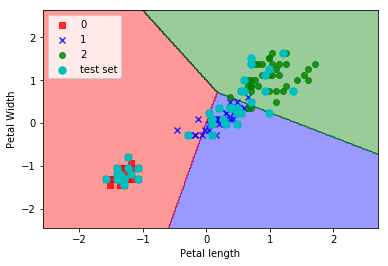

In [37]:
# Plot the data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#print('Entire data: %d x %d'%(X_combined_std.shape[0],X_combined_std.shape[1]))
#print('Entire label: %d'%(len(y_combined)))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx = range(105,150))
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()

### Logistic Regression

In [62]:
lr = LogisticRegression(C=10000.0, random_state=0)
lr.fit(X_train_std,y_train)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

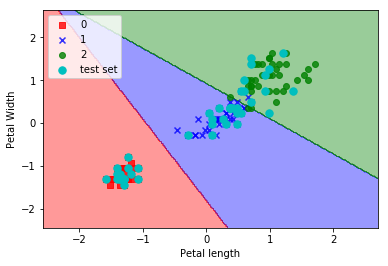

In [63]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx = range(105,150))
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()

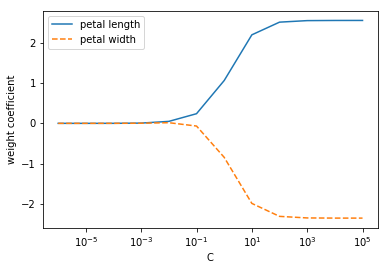

In [65]:
# Effect of regularization
weights,params = [],[]
for c in np.arange(-6,6):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights = np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### Support Vector Machines

In [109]:
# Train a SVM classifier
svm = SVC(C=100.0, kernel='rbf',random_state=0,gamma=0.2)
svm.fit(X_train_std,y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

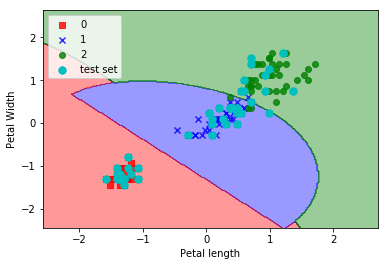

In [110]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx = range(105,150))
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()

### XOR Example to illustrate Kernels

In [88]:
# Create data
np.random.seed(2)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)

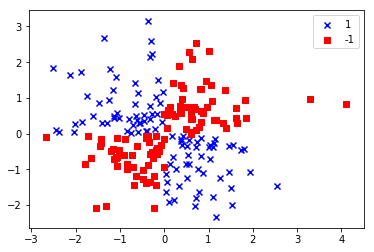

In [89]:
# Plot the XOR data
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1],c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1],c='r', marker='s',label='-1')
plt.legend()
plt.show()

In [99]:
# Train a SVM classifier
svm = SVC(C=100.0, kernel='rbf',gamma=1.0,random_state=0)
svm.fit(X_xor,y_xor)


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

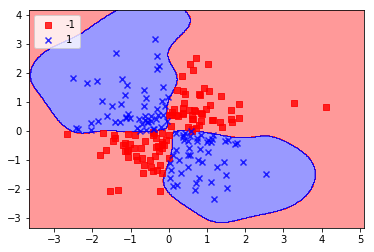

In [100]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

### Decision Tree Classifier 

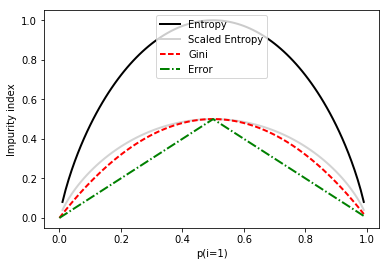

In [4]:
# Impurity comparisons

def gini(p):
    return (p * (1-p)) + ((1-p)*(1-(1-p)))

def entropy(p):
    return - (p*np.log2(p)) - ((1-p)*np.log2(1-p))

def error(p):
    return 1 - np.max([p,(1-p)])


x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!=0 else None for p in x]
scaledEntropy = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax=plt.subplot(111)

for i,lab, ls, c in zip([ent, scaledEntropy, gini(x), err],
                        ['Entropy','Scaled Entropy', 'Gini', 'Error'],
                        ['-','-','--','-.'],
                        ['black','lightgray','red','green','cyan']):
    
    line = ax.plot(x,i,label=lab,linestyle=ls, lw=2, color=c)
    
    
ax.legend(loc='upper center')
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.show()




In [25]:
# Building a classifer 
tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=3, random_state=0)
tree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

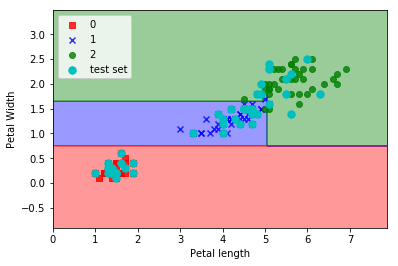

In [26]:
X_combined = np.vstack( (X_train,X_test))
y_combined = np.hstack( (y_train,y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=tree, test_idx = range(105,150))
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()

In [27]:
# Export and visualize
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length','petal width'])

### K-Nearest Neighbors

In [43]:
knn = KNeighborsClassifier(n_neighbors=5,p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

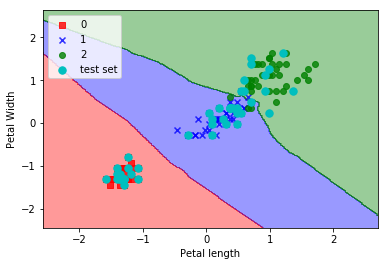

In [44]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=knn, test_idx = range(105,150))
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.show()